<a href="https://colab.research.google.com/github/dikoharyadhanto/Geopandas-Documentation/blob/main/002_Convert_CSV_Into_Esri_Shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 35.5 MB/s 
     |████████████████████████████████| 16.7 MB 327 kB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Copy Paste dataset from gdrive
import shutil

shutil.copy("/content/drive/MyDrive/Data/Spatial/world_airports.csv", "/tmp/World_Airports.csv")

'/tmp/World_Airports.csv'

In [12]:
url = '/tmp/World_Airports.csv'

#Read attribute table
df = pd.read_csv(url)
df

,Country,Lon,Lat
0,ACORES,-14.394,-7.969
1,ACORES,-9.030,38.883
2,ACORES,-25.171,36.971
3,ACORES,-6.712,41.868
4,ACORES,-7.932,38.079
...,...,...,...
4183,ZIMBABWE,30.859,-20.055
4184,ZIMBABWE,30.088,-20.289
4185,ZIMBABWE,29.862,-19.437
4186,ZIMBABWE,27.021,-18.630


# **Create GeoDataFrame**

Perbedaan antara Pandas DataFrame dengan Geopandas GeoDataFrame adalah terdapat **geometry column**

In [13]:
#Create Points geomery from CSV File
airport_shp = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))
airport_shp

,Country,Lon,Lat,geometry
0,ACORES,-14.394,-7.969,POINT (-14.39400 -7.96900)
1,ACORES,-9.030,38.883,POINT (-9.03000 38.88300)
2,ACORES,-25.171,36.971,POINT (-25.17100 36.97100)
3,ACORES,-6.712,41.868,POINT (-6.71200 41.86800)
4,ACORES,-7.932,38.079,POINT (-7.93200 38.07900)
...,...,...,...,...
4183,ZIMBABWE,30.859,-20.055,POINT (30.85900 -20.05500)
4184,ZIMBABWE,30.088,-20.289,POINT (30.08800 -20.28900)
4185,ZIMBABWE,29.862,-19.437,POINT (29.86200 -19.43700)
4186,ZIMBABWE,27.021,-18.630,POINT (27.02100 -18.63000)


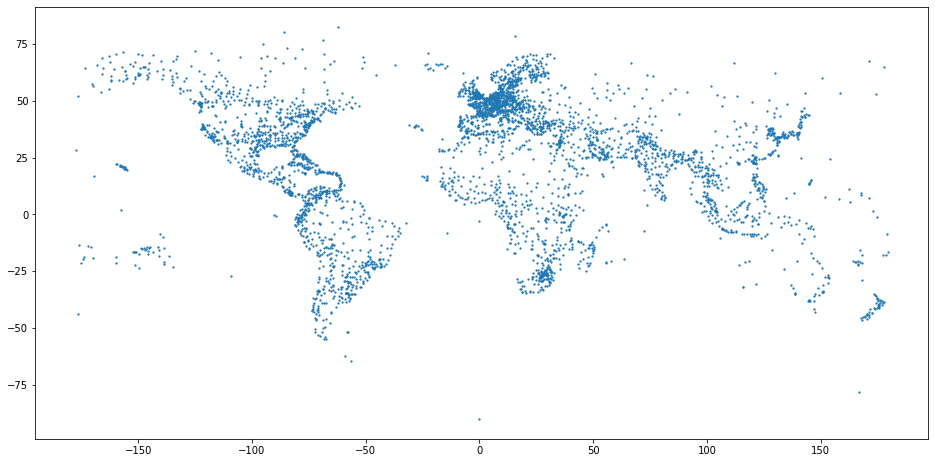

In [16]:
airport_shp.plot(markersize=1.5, figsize=(16,16))

# **Save the File as Esri Shapefile**

In [18]:
#Get WKT of choosen coordinate system from epsg website
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

In [22]:
#save file into shapefile
airport_shp.to_file(filename='world_airports.shp', 
                    driver='ESRI Shapefile',
                    crs=ESRI_WKT)